In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
train = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210916_株価の推移予測/train.csv") 
test = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210916_株価の推移予測/test.csv") 
submission = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210916_株価の推移予測/sample_submission.csv", header=None) 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
train.head()

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0


In [16]:
test.head()

,Date,Open,High,Low,Close
0,2012-01-19,110.79,110.82,109.96,110.39
1,2012-01-20,110.45,111.10,110.36,110.73
2,2012-01-23,110.95,111.10,109.65,110.36
3,2012-01-24,110.16,110.16,108.13,108.39
4,2012-01-25,106.25,107.11,105.97,106.89


In [17]:
submission.head()

,0,1
0,2012-01-26,0
1,2012-02-09,0
2,2012-02-24,0
3,2012-03-09,0
4,2012-03-23,0


In [18]:
submission.shape

(200, 2)

In [19]:
print(train.shape)
print(test.shape)

(2026, 6)
(1200, 5)


In [20]:
train.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
Up         int64
dtype: object

In [22]:
train.describe()

,Open,High,Low,Close,Up
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,72.338425,72.714126,71.977957,72.353968,0.515795
std,14.876363,14.968429,14.778285,14.874404,0.499874
min,50.430000,50.650000,50.400000,50.610000,0.000000
25%,57.702500,57.942500,57.415000,57.702500,0.000000
50%,73.970000,74.430000,73.325000,73.835000,1.000000
75%,81.230000,81.645000,80.717500,81.060000,1.000000
max,110.510000,111.020000,110.380000,110.810000,1.000000


In [24]:
train['Date'] = pd.to_datetime(train['Date'])

In [26]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y/%m/%d')
test['Date'] = pd.to_datetime(test['Date'], format='%Y/%m/%d')
train['Date']

0      2004-01-02
1      2004-01-05
2      2004-01-06
3      2004-01-07
4      2004-01-08
          ...    
2021   2012-01-11
2022   2012-01-12
2023   2012-01-13
2024   2012-01-17
2025   2012-01-18
Name: Date, Length: 2026, dtype: datetime64[ns]

In [27]:
train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month

In [28]:
train['week'] = ''
for i in range(len(train)):
    train['week'][i] = train.iloc[i]['Date'].strftime('%A')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
test['week'] = ''
for i in range(len(test)):
    test['week'][i] = test.iloc[i]['Date'].strftime('%A')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
train.set_index(keys='Date', inplace=True)
test.set_index(keys='Date', inplace=True)
train.head()

,Open,High,Low,Close,Up,Month,week
Date,,,,,,,
2004-01-02,50.85,50.91,50.62,50.72,1,1,Friday
2004-01-05,50.75,50.84,50.61,50.79,1,1,Monday
2004-01-06,50.87,51.26,50.86,51.15,1,1,Tuesday
2004-01-07,51.45,51.54,51.29,51.51,0,1,Wednesday
2004-01-08,51.15,51.33,51.02,51.28,0,1,Thursday


In [31]:
train.describe()

,Open,High,Low,Close,Up,Month
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,72.338425,72.714126,71.977957,72.353968,0.515795,6.523692
std,14.876363,14.968429,14.778285,14.874404,0.499874,3.441889
min,50.430000,50.650000,50.400000,50.610000,0.000000,1.000000
25%,57.702500,57.942500,57.415000,57.702500,0.000000,4.000000
50%,73.970000,74.430000,73.325000,73.835000,1.000000,7.000000
75%,81.230000,81.645000,80.717500,81.060000,1.000000,10.000000
max,110.510000,111.020000,110.380000,110.810000,1.000000,12.000000


In [32]:
test.describe()

,Open,High,Low,Close,Month
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,130.850575,131.469433,130.231283,130.850175,6.556667
std,29.564138,29.759571,29.304941,29.515361,3.403151
min,97.260000,97.690000,96.930000,97.470000,1.000000
25%,106.597500,107.120000,106.225000,106.630000,4.000000
50%,120.510000,121.085000,120.060000,120.495000,7.000000
75%,155.737500,156.652500,155.075000,155.737500,9.000000
max,205.550000,205.710000,202.530000,203.900000,12.000000


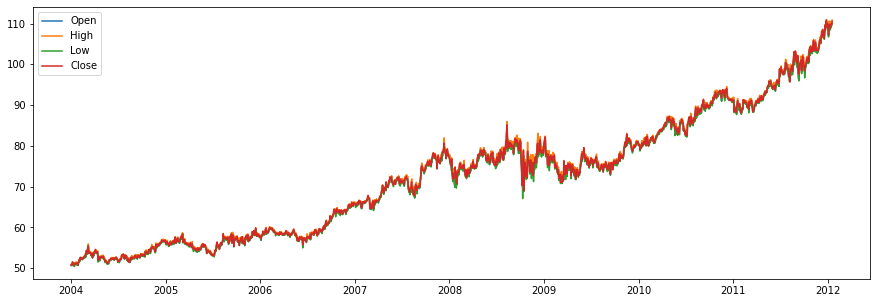

In [37]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor='white')
ax.plot(train['Open'], label='Open')
ax.plot(train['High'], label='High')
ax.plot(train['Low'], label='Low')
ax.plot(train['Close'], label='Close')
plt.legend(loc='upper left')
plt.show()

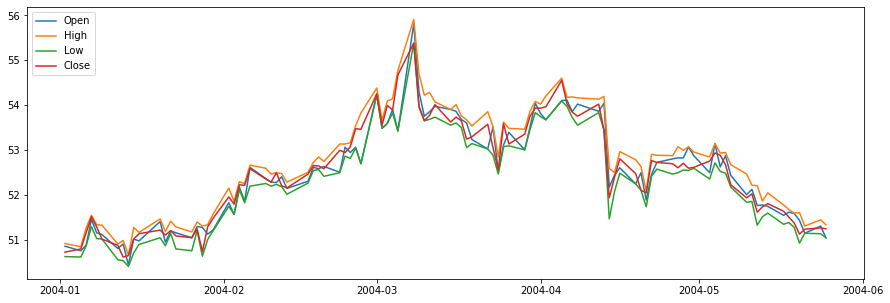

In [38]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor='white')
ax.plot(train.iloc[:100]['Open'], label='Open')
ax.plot(train.iloc[:100]['High'], label='High')
ax.plot(train.iloc[:100]['Low'], label='Low')
ax.plot(train.iloc[:100]['Close'], label='Close')
plt.legend(loc='upper left')
plt.show()

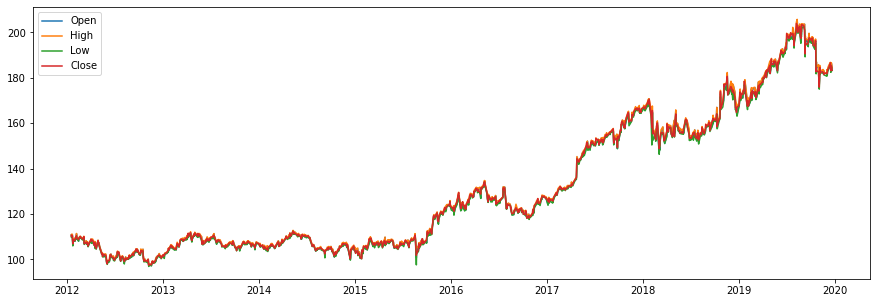

In [39]:
fig, ax = plt.subplots(figsize=(15, 5), facecolor='white')
ax.plot(test['Open'], label='Open')
ax.plot(test['High'], label='High')
ax.plot(test['Low'], label='Low')
ax.plot(test['Close'], label='Close')
plt.legend(loc='upper left')
plt.show()

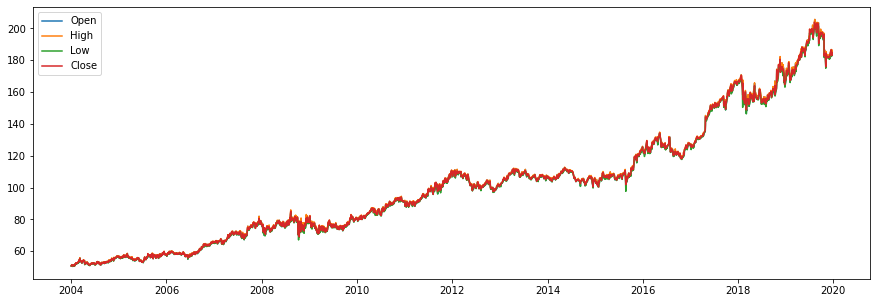

In [40]:
total = pd.concat([train, test])
#total = total.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(15, 5), facecolor='white')
ax.plot(total['Open'], label='Open')
ax.plot(total['High'], label='High')
ax.plot(total['Low'], label='Low')
ax.plot(total['Close'], label='Close')
plt.legend(loc='upper left')
plt.show()

In [41]:
total

,Open,High,Low,Close,Up,Month,week
Date,,,,,,,
2004-01-02,50.85,50.91,50.62,50.72,1.0,1,Friday
2004-01-05,50.75,50.84,50.61,50.79,1.0,1,Monday
2004-01-06,50.87,51.26,50.86,51.15,1.0,1,Tuesday
2004-01-07,51.45,51.54,51.29,51.51,0.0,1,Wednesday
2004-01-08,51.15,51.33,51.02,51.28,0.0,1,Thursday
...,...,...,...,...,...,...,...
2019-12-17,185.52,186.40,184.62,184.68,NaN,12,Tuesday
2019-12-18,183.86,184.01,182.38,183.10,NaN,12,Wednesday
2019-12-19,183.83,185.17,183.66,185.08,NaN,12,Thursday


In [42]:
train['Up'].value_counts()

1    1045
0     981
Name: Up, dtype: int64

## **標準化**

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train.iloc[0:4][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(train.iloc[0:4][['Open', 'High', 'Low', 'Close']])

repeat_time = int(len(train.iloc[4:])/6)
for i in range(repeat_time):
    start = 4 + i * 6
    end = start + 6
    scaler = StandardScaler()
    train.iloc[start: end][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(train.iloc[start: end][['Open', 'High', 'Low', 'Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [45]:
repeat_time = int(len(test)/6)
for i in range(repeat_time):
    start = i * 6
    end = start + 6
    scaler = StandardScaler()
    test.iloc[start: end][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(test.iloc[start: end][['Open', 'High', 'Low', 'Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [48]:
train.head()

,Open,High,Low,Close,Up,Month,week
Date,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,1,Friday
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,1,Monday
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,1,Tuesday
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,1,Wednesday
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,1,Thursday


In [49]:
test.head()

,Open,High,Low,Close,Month,week
Date,,,,,,
2012-01-19,0.729733,0.641307,0.824940,0.830168,1,Thursday
2012-01-20,0.520358,0.838271,1.095412,1.078124,1,Friday
2012-01-23,0.828262,0.838271,0.615324,0.808289,1,Monday
2012-01-24,0.341774,0.177033,-0.412470,-0.628399,1,Tuesday
2012-01-25,-2.066037,-1.968471,-1.873019,-1.722324,1,Wednesday


In [50]:
train['Body'] = train['Open'] - train['Close']
test['Body'] = test['Open'] - test['Close']
train['Body']

Date
2004-01-02    0.550061
2004-01-05   -0.035345
2004-01-06   -0.740653
2004-01-07    0.225937
2004-01-08   -0.592444
                ...   
2012-01-11   -0.577276
2012-01-12   -0.054234
2012-01-13   -0.070022
2012-01-17    0.372080
2012-01-18   -0.582233
Name: Body, Length: 2026, dtype: float64

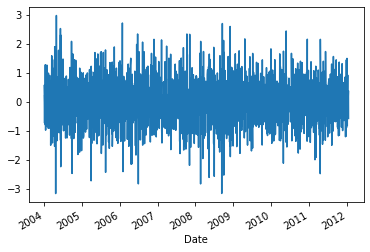

In [51]:
plt.figure(facecolor='white')
train['Body'].plot()

In [52]:
for i in range(1, 6):
    train['Body_rate_' + str(i)] = train['Body'].shift(i)
    train['Body_rate_' + str(i)] = train['Body_rate_' + str(i)].fillna(0)

In [53]:
for i in range(1, 6):
    test['Body_rate_' + str(i)] = test['Body'].shift(i)
    test['Body_rate_' + str(i)] = test['Body_rate_' + str(i)].fillna(0)

In [54]:
train['Body_rate_mean'] = (train['Body_rate_1'] + train['Body_rate_2'] + train['Body_rate_3'] +
                            train['Body_rate_4'] + train['Body_rate_5']) / 5

In [55]:
test['Body_rate_mean'] = (test['Body_rate_1'] + test['Body_rate_2'] + test['Body_rate_3'] +
                            test['Body_rate_4'] + test['Body_rate_5']) / 5

In [56]:
train.head(10)

,Open,High,Low,Close,Up,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean
Date,,,,,,,,,,,,,,
2004-01-02,-4.724930e-01,-0.807781,-0.816027,-1.022554,1,1,Friday,0.550061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2004-01-05,-8.359492e-01,-1.056329,-0.852294,-0.800605,1,1,Monday,-0.035345,0.550061,0.000000,0.000000,0.000000,0.000000,1.100123e-01
2004-01-06,-3.998018e-01,0.434959,0.054402,0.340851,1,1,Tuesday,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.000000,1.029433e-01
2004-01-07,1.708244e+00,1.429150,1.613919,1.482307,0,1,Wednesday,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.000000,-4.518733e-02
2004-01-08,1.035690e+00,1.008830,1.337497,1.628134,0,1,Thursday,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.000000,-1.483258e-14
2004-01-09,8.699799e-01,0.969268,1.295481,0.461064,0,1,Friday,0.408915,-0.592444,0.225937,-0.740653,-0.035345,0.550061,-1.184887e-01
2004-01-12,-4.142761e-01,-0.692334,-0.637237,-0.144083,0,1,Monday,-0.270193,0.408915,-0.592444,0.225937,-0.740653,-0.035345,-1.467179e-01
2004-01-13,-2.943609e-14,-0.375839,-0.721268,-1.267927,1,1,Tuesday,1.267927,-0.270193,0.408915,-0.592444,0.225937,-0.740653,-1.936877e-01
2004-01-14,-1.947098e+00,-1.681384,-1.267471,-1.138253,1,1,Wednesday,-0.808845,1.267927,-0.270193,0.408915,-0.592444,0.225937,2.080285e-01


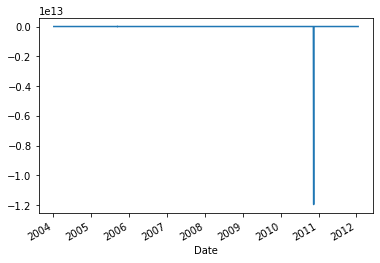

In [57]:
train_rate = (train['Close'] - train['Close'].shift(1)) / train['Close'].shift(1)
train_rate.plot()

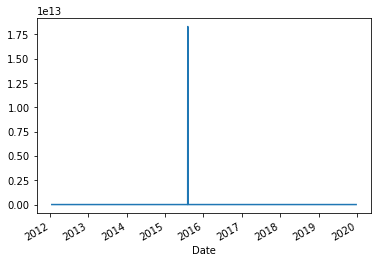

In [58]:
test_rate = (test['Close'] - test['Close'].shift(1)) / test['Close'].shift(1)
test_rate.plot()

In [59]:
train

,Open,High,Low,Close,Up,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean
Date,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,1,Friday,0.550061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,1,Monday,-0.035345,0.550061,0.000000,0.000000,0.000000,0.000000,1.100123e-01
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,1,Tuesday,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.000000,1.029433e-01
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,1,Wednesday,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.000000,-4.518733e-02
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,1,Thursday,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.000000,-1.483258e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-2.015053,-1.601022,-1.609062,-1.437777,1,1,Wednesday,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-0.077056,-3.949241e-02
2012-01-12,0.233322,-0.059931,0.449738,0.287555,0,1,Thursday,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-1.395363e-01
2012-01-13,-0.084844,-0.368149,-0.269843,-0.014822,1,1,Friday,-0.070022,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-3.142935e-02


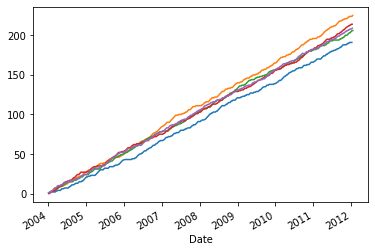

In [60]:
train[train['week']=='Monday']['Up'].cumsum().plot()
train[train['week']=='Tuesday']['Up'].cumsum().plot()
train[train['week']=='Wednesday']['Up'].cumsum().plot()
train[train['week']=='Thursday']['Up'].cumsum().plot()
train[train['week']=='Friday']['Up'].cumsum().plot()

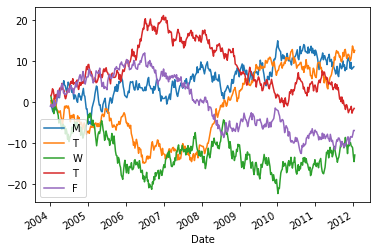

In [66]:
train[train['week']=='Monday']['Close'].cumsum().plot(label="M")
train[train['week']=='Tuesday']['Close'].cumsum().plot(label="T")
train[train['week']=='Wednesday']['Close'].cumsum().plot(label="W")
train[train['week']=='Thursday']['Close'].cumsum().plot(label="T")
train[train['week']=='Friday']['Close'].cumsum().plot(label="F")

plt.legend()

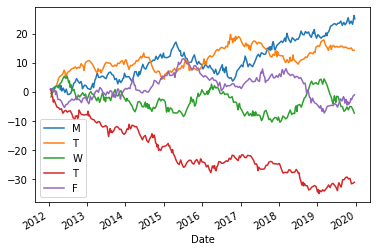

In [69]:
test[test['week']=='Monday']['Close'].cumsum().plot(label="M")
test[test['week']=='Tuesday']['Close'].cumsum().plot(label="T")
test[test['week']=='Wednesday']['Close'].cumsum().plot(label="W")
test[test['week']=='Thursday']['Close'].cumsum().plot(label="T")
test[test['week']=='Friday']['Close'].cumsum().plot(label="F")

plt.legend()

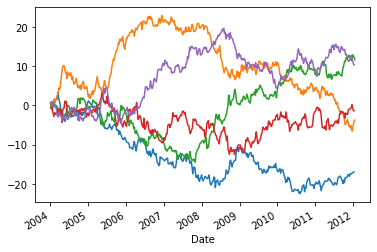

In [70]:
train[train['week']=='Monday']['Body'].cumsum().plot()
train[train['week']=='Tuesday']['Body'].cumsum().plot()
train[train['week']=='Wednesday']['Body'].cumsum().plot()
train[train['week']=='Thursday']['Body'].cumsum().plot()
train[train['week']=='Friday']['Body'].cumsum().plot()

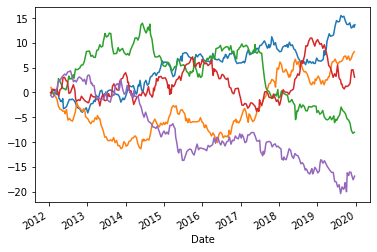

In [71]:
test[test['week']=='Monday']['Body'].cumsum().plot()
test[test['week']=='Tuesday']['Body'].cumsum().plot()
test[test['week']=='Wednesday']['Body'].cumsum().plot()
test[test['week']=='Thursday']['Body'].cumsum().plot()
test[test['week']=='Friday']['Body'].cumsum().plot()

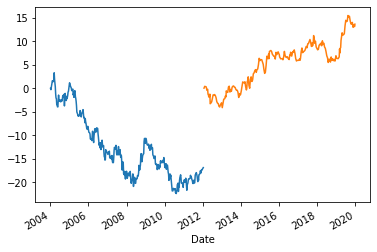

In [72]:
train[train['week']=='Monday']['Body'].cumsum().plot()
test[test['week']=='Monday']['Body'].cumsum().plot()

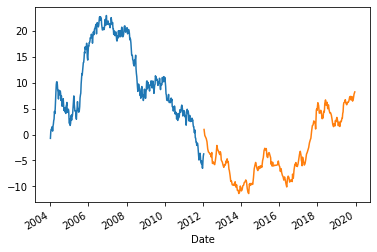

In [73]:
train[train['week']=='Tuesday']['Body'].cumsum().plot()
test[test['week']=='Tuesday']['Body'].cumsum().plot()

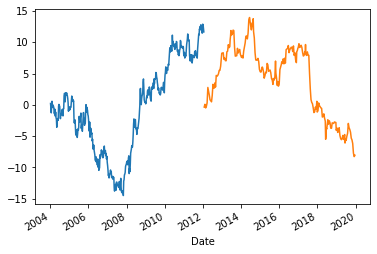

In [74]:
train[train['week']=='Wednesday']['Body'].cumsum().plot()
test[test['week']=='Wednesday']['Body'].cumsum().plot()

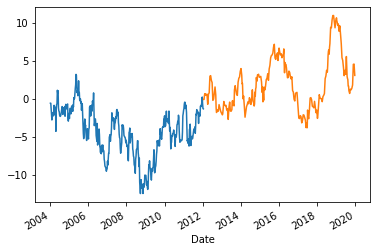

In [75]:
train[train['week']=='Thursday']['Body'].cumsum().plot()
test[test['week']=='Thursday']['Body'].cumsum().plot()

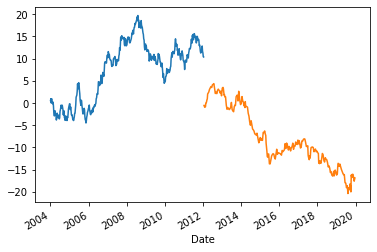

In [76]:
train[train['week']=='Friday']['Body'].cumsum().plot()
test[test['week']=='Friday']['Body'].cumsum().plot()

In [77]:
train_rate_1 = (train['Close'] - train['Close'].shift(1)) / train['Close'].shift(1)
train_rate_1 = train_rate_1.fillna(0)
train['Rate_1'] = train_rate_1

train_rate_2 = (train['Close'] - train['Close'].shift(2)) / train['Close'].shift(2)
train_rate_2 = train_rate_2.fillna(0)
train['Rate_2'] = train_rate_2

train_rate_3 = (train['Close'] - train['Close'].shift(3)) / train['Close'].shift(3)
train_rate_3 = train_rate_3.fillna(0)
train['Rate_3'] = train_rate_3

train_rate_4 = (train['Close'] - train['Close'].shift(4)) / train['Close'].shift(4)
train_rate_4 = train_rate_4.fillna(0)
train['Rate_4'] = train_rate_4

train_rate_5 = (train['Close'] - train['Close'].shift(5)) / train['Close'].shift(5)
train_rate_5 = train_rate_5.fillna(0)
train['Rate_5'] = train_rate_5

In [78]:
test_rate_1 = (test['Close'] - test['Close'].shift(1)) / test['Close'].shift(1)
test_rate_1 = test_rate_1.fillna(0)
test['Rate_1'] = test_rate_1

test_rate_2 = (test['Close'] - test['Close'].shift(2)) / test['Close'].shift(2)
test_rate_2 = test_rate_2.fillna(0)
test['Rate_2'] = test_rate_2

test_rate_3 = (test['Close'] - test['Close'].shift(3)) / test['Close'].shift(3)
test_rate_3 = test_rate_3.fillna(0)
test['Rate_3'] = test_rate_3

test_rate_4 = (test['Close'] - test['Close'].shift(4)) / test['Close'].shift(4)
test_rate_4 = test_rate_4.fillna(0)
test['Rate_4'] = test_rate_4

test_rate_5 = (test['Close'] - test['Close'].shift(5)) / test['Close'].shift(5)
test_rate_5 = test_rate_5.fillna(0)
test['Rate_5'] = test_rate_5

In [79]:
train['rate_total'] = train_rate_1 + train_rate_2 + train_rate_3 + train_rate_4 + train_rate_5
test['rate_total'] = test_rate_1 + test_rate_2 + test_rate_3 + test_rate_4 + test_rate_5

In [80]:
train['rate_5_mean'] = (train_rate_1 + train_rate_2 + train_rate_3 + train_rate_4 + train_rate_5) / 5
test['rate_5_mean'] = (test_rate_1 + test_rate_2 + test_rate_3 + test_rate_4 + test_rate_5) / 5

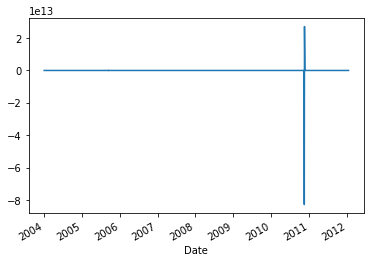

In [81]:
train['rate_total'].plot()

In [82]:
train.head()

,Open,High,Low,Close,Up,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,1,Friday,0.550061,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,1,Monday,-0.035345,0.550061,0.000000,0.000000,0.000000,0.0,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.0,-0.217054,-0.043411
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,1,Tuesday,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.0,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.0,-2.759076,-0.551815
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,1,Wednesday,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.0,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.0,-1.952260,-0.390452
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,1,Thursday,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.0,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.0,-1.750808,-0.350162


In [83]:
test.head()

,Open,High,Low,Close,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean
Date,,,,,,,,,,,,,,,,,,,,
2012-01-19,0.729733,0.641307,0.824940,0.830168,1,Thursday,-0.100435,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2012-01-20,0.520358,0.838271,1.095412,1.078124,1,Friday,-0.557766,-0.100435,0.000000,0.000000,0.000000,0.0,-0.020087,0.298682,0.000000,0.000000,0.000000,0.0,0.298682,0.059736
2012-01-23,0.828262,0.838271,0.615324,0.808289,1,Monday,0.019973,-0.557766,-0.100435,0.000000,0.000000,0.0,-0.131640,-0.250282,-0.026354,0.000000,0.000000,0.0,-0.276636,-0.055327
2012-01-24,0.341774,0.177033,-0.412470,-0.628399,1,Tuesday,0.970173,0.019973,-0.557766,-0.100435,0.000000,0.0,-0.127646,-1.777444,-1.582864,-1.756955,0.000000,0.0,-5.117262,-1.023452
2012-01-25,-2.066037,-1.968471,-1.873019,-1.722324,1,Wednesday,-0.343713,0.970173,0.019973,-0.557766,-0.100435,0.0,0.066389,1.740812,-3.130827,-2.597520,-3.074671,0.0,-7.062205,-1.412441


In [84]:
for i in range(6):
    high_low = [0] * i

    for j in range((i+1), 2027):
        hl = train.iloc[j - (i+1): j]['High'].max() - train.iloc[j-1:j]['Low'].min()
        high_low.append(hl)
    train['high_low_' + str(i+1)] = high_low

In [85]:
for i in range(6):
    high_low = [0] * i

    for j in range((i+1), 1201):
        hl = test.iloc[j - (i+1): j]['High'].max() - test.iloc[j-1:j]['Low'].min()
        high_low.append(hl)
    test['high_low_' + str(i+1)] = high_low

In [86]:
#j上記コードの元
'''
high_low_1 = [0] * 0
for i in range(1, 2027):
    high_low = train.iloc[i-1:i]['High'].max() - train.iloc[i-1:i]['Low'].min()
    high_low_1.append(high_low)
train['high_low_1'] = high_low_1

high_low_2= [0] * 1
for i in range(2, 2027):
    high_low = train.iloc[i-2:i]['High'].max() - train.iloc[i-2:i]['Low'].min()
    high_low_2.append(high_low)
train['high_low_2'] = high_low_2
'''

"\nhigh_low_1 = [0] * 0\nfor i in range(1, 2027):\n    high_low = train.iloc[i-1:i]['High'].max() - train.iloc[i-1:i]['Low'].min()\n    high_low_1.append(high_low)\ntrain['high_low_1'] = high_low_1\n\nhigh_low_2= [0] * 1\nfor i in range(2, 2027):\n    high_low = train.iloc[i-2:i]['High'].max() - train.iloc[i-2:i]['Low'].min()\n    high_low_2.append(high_low)\ntrain['high_low_2'] = high_low_2\n"

In [87]:
train.head()

,Open,High,Low,Close,Up,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,1,Friday,0.550061,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.008246,0.000000,0.000000,0.000000,0.000000,0.0
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,1,Monday,-0.035345,0.550061,0.000000,0.000000,0.000000,0.0,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.0,-0.217054,-0.043411,-0.204034,0.044514,0.000000,0.000000,0.000000,0.0
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,1,Tuesday,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.0,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.0,-2.759076,-0.551815,0.380557,0.380557,0.380557,0.000000,0.000000,0.0
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,1,Wednesday,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.0,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.0,-1.952260,-0.390452,-0.184769,-0.184769,-0.184769,-0.184769,0.000000,0.0
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,1,Thursday,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.0,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.0,-1.750808,-0.350162,-0.328667,0.091653,0.091653,0.091653,0.091653,0.0


In [88]:
test.head()

,Open,High,Low,Close,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-19,0.729733,0.641307,0.824940,0.830168,1,Thursday,-0.100435,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.183633,0.000000,0.000000,0.000000,0.00000,0.0
2012-01-20,0.520358,0.838271,1.095412,1.078124,1,Friday,-0.557766,-0.100435,0.000000,0.000000,0.000000,0.0,-0.020087,0.298682,0.000000,0.000000,0.000000,0.0,0.298682,0.059736,-0.257141,-0.257141,0.000000,0.000000,0.00000,0.0
2012-01-23,0.828262,0.838271,0.615324,0.808289,1,Monday,0.019973,-0.557766,-0.100435,0.000000,0.000000,0.0,-0.131640,-0.250282,-0.026354,0.000000,0.000000,0.0,-0.276636,-0.055327,0.222947,0.222947,0.222947,0.000000,0.00000,0.0
2012-01-24,0.341774,0.177033,-0.412470,-0.628399,1,Tuesday,0.970173,0.019973,-0.557766,-0.100435,0.000000,0.0,-0.127646,-1.777444,-1.582864,-1.756955,0.000000,0.0,-5.117262,-1.023452,0.589503,1.250741,1.250741,1.250741,0.00000,0.0
2012-01-25,-2.066037,-1.968471,-1.873019,-1.722324,1,Wednesday,-0.343713,0.970173,0.019973,-0.557766,-0.100435,0.0,0.066389,1.740812,-3.130827,-2.597520,-3.074671,0.0,-7.062205,-1.412441,-0.095453,2.050052,2.711290,2.711290,2.71129,0.0


In [89]:
print(train.shape)
print(test.shape)

(2026, 27)
(1200, 26)


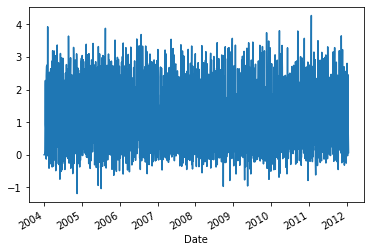

In [90]:
train['high_low_5'].plot()

In [91]:
print(train[train['week']=='Monday']['Up'].value_counts())
print(train[train['week']=='Tuesday']['Up'].value_counts())
print(train[train['week']=='Wednesday']['Up'].value_counts())
print(train[train['week']=='Thursday']['Up'].value_counts())
print(train[train['week']=='Friday']['Up'].value_counts())

1    191
0    186
Name: Up, dtype: int64
1    225
0    191
Name: Up, dtype: int64
0    213
1    206
Name: Up, dtype: int64
1    214
0    195
Name: Up, dtype: int64
1    209
0    196
Name: Up, dtype: int64


## **月別のUpの平均**

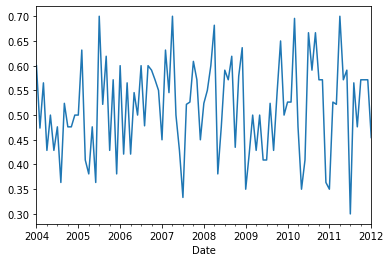

In [92]:
sr_up = train['Up']
up_monthly = sr_up.resample(rule='M')
up_mean = up_monthly.mean()
up_mean.plot(kind='line')
plt.show()

## **標準化**

In [93]:
'''
from sklearn.preprocessing import StandardScaler

repeat_time = int(len(train.iloc[4:])/6)
for i in range(repeat_time):
    start = 4 + i * 6
    end = start + 6
    scaler = StandardScaler()
    train.iloc[start: end][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(train.iloc[start: end][['Open', 'High', 'Low', 'Close']])
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\nrepeat_time = int(len(train.iloc[4:])/6)\nfor i in range(repeat_time):\n    start = 4 + i * 6\n    end = start + 6\n    scaler = StandardScaler()\n    train.iloc[start: end][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(train.iloc[start: end][['Open', 'High', 'Low', 'Close']])\n"

In [94]:
'''
repeat_time = int(len(test)/6)
for i in range(repeat_time):
    start = i * 6
    end = start + 6
    scaler = StandardScaler()
    test.iloc[start: end][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(test.iloc[start: end][['Open', 'High', 'Low', 'Close']])
'''

"\nrepeat_time = int(len(test)/6)\nfor i in range(repeat_time):\n    start = i * 6\n    end = start + 6\n    scaler = StandardScaler()\n    test.iloc[start: end][['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(test.iloc[start: end][['Open', 'High', 'Low', 'Close']])\n"

In [95]:
train

,Open,High,Low,Close,Up,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,1,Friday,0.550061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008246,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,1,Monday,-0.035345,0.550061,0.000000,0.000000,0.000000,0.000000,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.000000,-0.217054,-0.043411,-0.204034,0.044514,0.000000,0.000000,0.000000,0.000000
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,1,Tuesday,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.000000,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.000000,-2.759076,-0.551815,0.380557,0.380557,0.380557,0.000000,0.000000,0.000000
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,1,Wednesday,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.000000,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.000000,-1.952260,-0.390452,-0.184769,-0.184769,-0.184769,-0.184769,0.000000,0.000000
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,1,Thursday,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.000000,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.000000,-1.750808,-0.350162,-0.328667,0.091653,0.091653,0.091653,0.091653,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-2.015053,-1.601022,-1.609062,-1.437777,1,1,Wednesday,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-0.077056,-3.949241e-02,0.474164,-3.371534,-2.529730,-5.887674,-0.256421,-11.571195,-2.314239,0.008040,1.206666,2.457290,2.457290,2.457290,2.457290
2012-01-12,0.233322,-0.059931,0.449738,0.287555,0,1,Thursday,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-1.395363e-01,-1.200000,-1.294833,-0.525693,-0.694054,-0.022465,-3.737045,-0.747409,-0.509669,-0.509669,-0.509669,0.398491,0.398491,0.398491
2012-01-13,-0.084844,-0.368149,-0.269843,-0.014822,1,1,Friday,-0.070022,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-3.142935e-02,-1.051546,-0.989691,-0.984802,-1.024449,-1.015770,-5.066259,-1.013252,-0.098307,0.209911,0.209911,0.209911,1.118071,1.118071


In [96]:
test

,Open,High,Low,Close,Month,week,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-19,0.729733,0.641307,0.824940,0.830168,1,Thursday,-0.100435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.183633,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-20,0.520358,0.838271,1.095412,1.078124,1,Friday,-0.557766,-0.100435,0.000000,0.000000,0.000000,0.000000,-0.020087,0.298682,0.000000,0.000000,0.000000,0.000000,0.298682,0.059736,-0.257141,-0.257141,0.000000,0.000000,0.000000,0.000000
2012-01-23,0.828262,0.838271,0.615324,0.808289,1,Monday,0.019973,-0.557766,-0.100435,0.000000,0.000000,0.000000,-0.131640,-0.250282,-0.026354,0.000000,0.000000,0.000000,-0.276636,-0.055327,0.222947,0.222947,0.222947,0.000000,0.000000,0.000000
2012-01-24,0.341774,0.177033,-0.412470,-0.628399,1,Tuesday,0.970173,0.019973,-0.557766,-0.100435,0.000000,0.000000,-0.127646,-1.777444,-1.582864,-1.756955,0.000000,0.000000,-5.117262,-1.023452,0.589503,1.250741,1.250741,1.250741,0.000000,0.000000
2012-01-25,-2.066037,-1.968471,-1.873019,-1.722324,1,Wednesday,-0.343713,0.970173,0.019973,-0.557766,-0.100435,0.000000,0.066389,1.740812,-3.130827,-2.597520,-3.074671,0.000000,-7.062205,-1.412441,-0.095453,2.050052,2.711290,2.711290,2.711290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-17,0.452411,0.755367,0.567003,0.015569,12,Tuesday,0.436842,-0.397057,0.375934,-0.958022,0.040756,-0.548578,-0.297393,-0.990443,-0.988645,-0.987212,-0.917677,-1.017562,-4.901540,-0.980308,0.188364,0.541171,1.129265,1.129265,1.129265,1.129265
2019-12-18,-1.106763,-1.406702,-1.567597,-1.326173,12,Wednesday,0.219410,0.436842,-0.397057,0.375934,-0.958022,0.040756,-0.100309,-86.181818,-1.814075,-1.967226,-2.089303,-8.012387,-100.064809,-20.012962,0.160895,2.322965,2.675771,3.263866,3.263866,3.263866
2019-12-19,-1.134941,-0.357330,-0.347825,0.355250,12,Thursday,-1.490191,0.219410,0.436842,-0.397057,0.375934,-0.958022,-0.064579,-1.267876,21.818182,-0.781929,-0.740903,-0.708202,18.319272,3.663854,-0.009504,-0.009504,1.103193,1.455999,2.044094,2.044094


## **Monthのone-hot-encoding**

In [97]:
train = pd.get_dummies(train, drop_first=True, columns=['Month', 'week'])
test = pd.get_dummies(test, drop_first=True, columns=['Month', 'week'])

In [98]:
train

,Open,High,Low,Close,Up,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,0.550061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008246,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,-0.035345,0.550061,0.000000,0.000000,0.000000,0.000000,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.000000,-0.217054,-0.043411,-0.204034,0.044514,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.000000,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.000000,-2.759076,-0.551815,0.380557,0.380557,0.380557,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.000000,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.000000,-1.952260,-0.390452,-0.184769,-0.184769,-0.184769,-0.184769,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.000000,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.000000,-1.750808,-0.350162,-0.328667,0.091653,0.091653,0.091653,0.091653,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-2.015053,-1.601022,-1.609062,-1.437777,1,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-0.077056,-3.949241e-02,0.474164,-3.371534,-2.529730,-5.887674,-0.256421,-11.571195,-2.314239,0.008040,1.206666,2.457290,2.457290,2.457290,2.457290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2012-01-12,0.233322,-0.059931,0.449738,0.287555,0,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-1.395363e-01,-1.200000,-1.294833,-0.525693,-0.694054,-0.022465,-3.737045,-0.747409,-0.509669,-0.509669,-0.509669,0.398491,0.398491,0.398491,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-01-13,-0.084844,-0.368149,-0.269843,-0.014822,1,-0.070022,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-3.142935e-02,-1.051546,-0.989691,-0.984802,-1.024449,-1.015770,-5.066259,-1.013252,-0.098307,0.209911,0.209911,0.209911,1.118071,1.118071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **CSVファイルの書き出し**

In [99]:
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')

## **前処理後のデータの読み込み**

In [100]:
train = pd.read_csv('train_data.csv', index_col=0)
test = pd.read_csv('test_data.csv', index_col=0)
train.head()

,Open,High,Low,Close,Up,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,0.550061,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.008246,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,-0.035345,0.550061,0.000000,0.000000,0.000000,0.0,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.0,-0.217054,-0.043411,-0.204034,0.044514,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.0,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.0,-2.759076,-0.551815,0.380557,0.380557,0.380557,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.0,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.0,-1.952260,-0.390452,-0.184769,-0.184769,-0.184769,-0.184769,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.0,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.0,-1.750808,-0.350162,-0.328667,0.091653,0.091653,0.091653,0.091653,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## **目的変数と説明変数の分割**

In [101]:
x = train.drop('Up', axis=1)
y = train['Up']
x

,Open,High,Low,Close,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,0.550061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008246,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,-0.035345,0.550061,0.000000,0.000000,0.000000,0.000000,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.000000,-0.217054,-0.043411,-0.204034,0.044514,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-06,-0.399802,0.434959,0.054402,0.340851,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.000000,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.000000,-2.759076,-0.551815,0.380557,0.380557,0.380557,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-07,1.708244,1.429150,1.613919,1.482307,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.000000,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.000000,-1.952260,-0.390452,-0.184769,-0.184769,-0.184769,-0.184769,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-08,1.035690,1.008830,1.337497,1.628134,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.000000,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.000000,-1.750808,-0.350162,-0.328667,0.091653,0.091653,0.091653,0.091653,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-2.015053,-1.601022,-1.609062,-1.437777,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-0.077056,-3.949241e-02,0.474164,-3.371534,-2.529730,-5.887674,-0.256421,-11.571195,-2.314239,0.008040,1.206666,2.457290,2.457290,2.457290,2.457290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2012-01-12,0.233322,-0.059931,0.449738,0.287555,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-1.395363e-01,-1.200000,-1.294833,-0.525693,-0.694054,-0.022465,-3.737045,-0.747409,-0.509669,-0.509669,-0.509669,0.398491,0.398491,0.398491,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-01-13,-0.084844,-0.368149,-0.269843,-0.014822,-0.070022,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-3.142935e-02,-1.051546,-0.989691,-0.984802,-1.024449,-1.015770,-5.066259,-1.013252,-0.098307,0.209911,0.209911,0.209911,1.118071,1.118071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **データの分割**

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

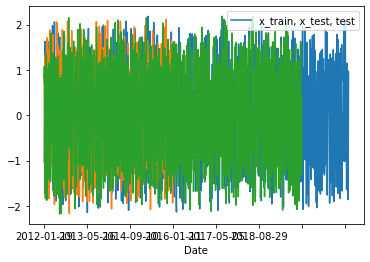

In [105]:
x_train['Close'].plot(kind='line')
x_test['Close'].plot(kind='line')
test['Close'].plot(kind='line')
plt.legend(['x_train, x_test, test'])
plt.show()

## **標準化**

In [104]:
from sklearn.preprocessing import StandardScaler

def get_standardized(x, num_date):
    x = np.array(x)
    x_t_list = []
    for i in range(len(x) - num_date + 1):
        x_t = x[i: i+num_date]
        scaler = StandardScaler()
        x_standardized = scaler.fit_transform(x_t)
        x_t_list.append(x_standardized)
    return np.array(x_t_list)

num_date = 6

x_train = get_standardized(x=x_train, num_date=num_date)
x_test = get_standardized(x=x_test, num_date=num_date)
test = get_standardized(x=test, num_date=num_date)

print(x_train.shape)
print(x_test.shape)
print(test.shape)

ValueError: ignored

In [ ]:
y_train = y_train[num_date-1:]
y_test = y_test[num_date-1:]

In [ ]:
print(y_train.shape)
print(y_test.shape)

(1413,)
(603,)


## **目的変数の平均**

In [ ]:
print(y_train.mean())
print(y_test.mean())

0.5095541401273885
0.5290215588723052


## **LSTMネットワーク**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.layers import Dropout

num_l1 = 100
num_l2 = 30
num_output = 1

#dropout_rate = 0.4

model = Sequential()
model.add(LSTM(units=num_l1,
               activation='tanh',
               batch_input_shape=(None, x_train.shape[1], x_train.shape[2])))
#model.add(Dropout(dropout_rate))
model.add(Dense(num_l2, activation='relu'))
#model.add(Dropout(dropout_rate))
model.add(Dense(num_output, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
results = model.fit(x=x_train, y=y_train, epochs=30, batch_size=24, validation_data=(x_train, y_train))

Epoch 1/30
59/59 [==============================] - 3s 16ms/step - loss: 0.6873 - accuracy: 0.5321 - val_loss: 0.6560 - val_accuracy: 0.6164
Epoch 2/30
59/59 [==============================] - 1s 11ms/step - loss: 0.6589 - accuracy: 0.6230 - val_loss: 0.6178 - val_accuracy: 0.6787
Epoch 3/30
59/59 [==============================] - 0s 8ms/step - loss: 0.6146 - accuracy: 0.6671 - val_loss: 0.5786 - val_accuracy: 0.7084
Epoch 4/30
59/59 [==============================] - 0s 8ms/step - loss: 0.5886 - accuracy: 0.6773 - val_loss: 0.5514 - val_accuracy: 0.7219
Epoch 5/30
59/59 [==============================] - 1s 9ms/step - loss: 0.5544 - accuracy: 0.7195 - val_loss: 0.5278 - val_accuracy: 0.7459
Epoch 6/30
59/59 [==============================] - 0s 8ms/step - loss: 0.5233 - accuracy: 0.7321 - val_loss: 0.4961 - val_accuracy: 0.7657
Epoch 7/30
59/59 [==============================] - 1s 8ms/step - loss: 0.4994 - accuracy: 0.7613 - val_loss: 0.4771 - val_accuracy: 0.7721
Epoch 8/30
59/59 [

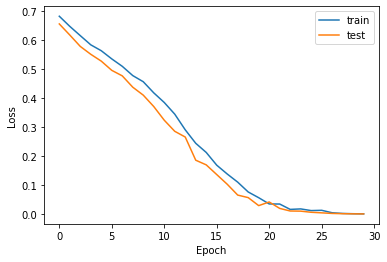

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train', 'test'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

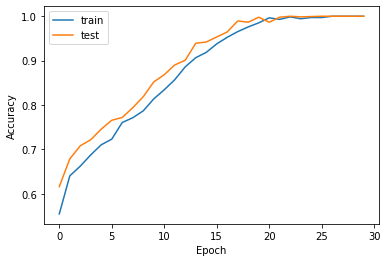

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('-----評価データの正解率-----')
print(accuracy)

19/19 [==============================] - 0s 2ms/step - loss: 2.2401 - accuracy: 0.6269
-----評価データの正解率-----
0.6268656849861145


In [ ]:
from sklearn.metrics import accuracy_score

pred_prob = model.predict(x_test)
print('-----予測結果の先頭10件-----')
print(pred_prob[:10])

pred = np.round(pred_prob)

print('-----丸め込んだ予測結果の先頭10件-----')
print(pred[:10])

accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print('-----評価データの正解率-----')
print(accuracy)

-----予測結果の先頭10件-----
[[9.9991053e-01]
 [5.7086349e-04]
 [9.9764681e-01]
 [8.9483082e-02]
 [9.9999917e-01]
 [9.9464142e-01]
 [9.9729633e-01]
 [3.2834498e-05]
 [8.7450016e-01]
 [3.2104099e-01]]
-----丸め込んだ予測結果の先頭10件-----
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]
-----評価データの正解率-----
0.6268656716417911


## **投稿用ファイルの生成**

In [ ]:
pred = model.predict(test)
pred = np.round(pred)
pred = np.squeeze(pred)
y_submit = pd.Series(pred)
y_submit = y_submit.astype(int)
y_submit = y_submit[::6].reset_index(drop=True)
y_submit

0      0
1      0
2      1
3      0
4      0
      ..
195    1
196    0
197    0
198    0
199    1
Length: 200, dtype: int64

In [ ]:
submission = pd.read_csv('sample_submission.csv', header=None)
submission[0] = pd.to_datetime(submission[0], format='%Y/%m/%d')
submission[1] = y_submit

In [ ]:
submission.to_csv('submit_lstm.csv', index=False, header=False)

## **前処理後のデータの読み込み**

In [ ]:
train = pd.read_csv('train_data.csv', index_col=0)
test = pd.read_csv('test_data.csv', index_col=0)
train.head()

,Open,High,Low,Close,Up,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-0.472493,-0.807781,-0.816027,-1.022554,1,0.550061,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.008246,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,-0.835949,-1.056329,-0.852294,-0.800605,1,-0.035345,0.550061,0.000000,0.000000,0.000000,0.0,1.100123e-01,-0.217054,0.000000,0.000000,0.000000,0.0,-0.217054,-0.043411,-0.204034,0.044514,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-06,-0.399802,0.434959,0.054402,0.340851,1,-0.740653,-0.035345,0.550061,0.000000,0.000000,0.0,1.029433e-01,-1.425743,-1.333333,0.000000,0.000000,0.0,-2.759076,-0.551815,0.380557,0.380557,0.380557,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-07,1.708244,1.429150,1.613919,1.482307,0,0.225937,-0.740653,-0.035345,0.550061,0.000000,0.0,-4.518733e-02,3.348837,-2.851485,-2.449612,0.000000,0.0,-1.952260,-0.390452,-0.184769,-0.184769,-0.184769,-0.184769,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-08,1.035690,1.008830,1.337497,1.628134,0,-0.592444,0.225937,-0.740653,-0.035345,0.550061,0.0,-1.483258e-14,0.098378,3.776667,-3.033631,-2.592222,0.0,-1.750808,-0.350162,-0.328667,0.091653,0.091653,0.091653,0.091653,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
x = train.drop('Up', axis=1).iloc[5:]
y = train['Up'].iloc[5:]
x

,Open,High,Low,Close,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-09,8.699799e-01,0.969268,1.295481,0.461064,0.408915,-0.592444,0.225937,-0.740653,-0.035345,0.550061,-0.118489,-0.716814,-0.688955,0.352685,-1.575895,-1.450895,-4.079875,-0.815975,-0.326213,-0.286651,0.133669,0.133669,0.133669,0.133669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-12,-4.142761e-01,-0.692334,-0.637237,-0.144083,-0.270193,0.408915,-0.592444,0.225937,-0.740653,-0.035345,-0.146718,-1.312500,-1.088496,-1.097202,-1.422714,-0.820033,-5.740944,-1.148189,-0.055098,1.606505,1.646067,2.066387,2.066387,2.066387,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-13,-2.943609e-14,-0.375839,-0.721268,-1.267927,1.267927,-0.270193,0.408915,-0.592444,0.225937,-0.740653,-0.193688,7.800000,-3.750000,-1.778761,-1.855374,-4.719882,-4.304018,-0.860804,0.345429,0.345429,1.690536,1.730098,2.150418,2.150418,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-14,-1.947098e+00,-1.681384,-1.267471,-1.138253,-0.808845,1.267927,-0.270193,0.408915,-0.592444,0.225937,0.208028,-0.102273,6.900000,-3.468750,-1.699115,-1.767893,-0.138030,-0.027606,-0.413913,0.891632,0.891632,2.236739,2.276301,2.696621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-15,4.557037e-01,0.771458,-0.007003,0.461064,-0.005361,-0.808845,1.267927,-0.270193,0.408915,-0.592444,0.001072,-1.405063,-1.363636,-4.200000,0.000000,-0.716814,-7.685514,-1.537103,0.778461,0.778461,0.778461,0.778461,0.976271,1.015833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-2.015053e+00,-1.601022,-1.609062,-1.437777,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-0.077056,-0.039492,0.474164,-3.371534,-2.529730,-5.887674,-0.256421,-11.571195,-2.314239,0.008040,1.206666,2.457290,2.457290,2.457290,2.457290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2012-01-12,2.333219e-01,-0.059931,0.449738,0.287555,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-0.594768,-0.139536,-1.200000,-1.294833,-0.525693,-0.694054,-0.022465,-3.737045,-0.747409,-0.509669,-0.509669,-0.509669,0.398491,0.398491,0.398491,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-01-13,-8.484433e-02,-0.368149,-0.269843,-0.014822,-0.070022,-0.054234,-0.577276,0.911684,0.394804,-0.832126,-0.031429,-1.051546,-0.989691,-0.984802,-1.024449,-1.015770,-5.066259,-1.013252,-0.098307,0.209911,0.209911,0.209911,1.118071,1.118071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''
x = train.drop(['Up', 'Open', 'High', 'Low', 'Close'], axis=1).iloc[5:]
y = train['Up'].iloc[5:]
x
'''

,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-09,0.10,-0.13,-0.06,-0.28,-0.04,0.13,-0.076,-0.005265,-0.009707,-0.002737,0.004332,0.005718,-0.007660,-0.001532,0.31,0.32,0.53,0.53,0.53,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-12,-0.07,0.10,-0.13,-0.06,-0.28,-0.04,-0.082,-0.002745,-0.007995,-0.012425,-0.005474,0.001575,-0.027064,-0.005413,0.35,0.77,0.78,0.99,0.99,0.99,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-13,0.29,-0.07,0.10,-0.13,-0.06,-0.28,-0.088,-0.005111,-0.007842,-0.013066,-0.017472,-0.010557,-0.054048,-0.010810,0.45,0.45,0.79,0.80,1.01,1.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-14,-0.21,0.29,-0.07,0.10,-0.13,-0.06,0.026,0.000593,-0.004521,-0.007253,-0.012480,-0.016890,-0.040552,-0.008110,0.25,0.58,0.58,0.92,0.93,1.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-15,0.00,-0.21,0.29,-0.07,0.10,-0.13,-0.004,0.007306,0.007904,0.002752,0.000000,-0.005265,0.012697,0.002539,0.57,0.57,0.57,0.57,0.62,0.63,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-0.24,0.42,0.96,-0.40,-0.28,-0.22,0.096,-0.002383,-0.006298,-0.009102,-0.003661,0.015580,-0.005865,-0.001173,0.59,1.29,2.14,2.14,2.14,2.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2012-01-12,-0.15,-0.24,0.42,0.96,-0.40,-0.28,0.092,0.008911,0.006507,0.002556,-0.000273,0.005217,0.022917,0.004583,0.46,0.46,0.46,1.11,1.11,1.11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-01-13,-0.13,-0.15,-0.24,0.42,0.96,-0.40,0.118,-0.001548,0.007349,0.004949,0.001004,-0.001820,0.009933,0.001987,0.64,0.82,0.82,0.82,1.47,1.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **データの分割**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

## **標準化**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#columns = x.columns
#scaler = StandardScaler()
#scaler.fit(x)
#x = scaler.transform(x)
#x = pd.DataFrame(x, columns=columns)

In [ ]:
x

,Open,High,Low,Close,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-09,8.699799e-01,0.969268,1.295481,0.461064,0.10,-0.13,-0.06,-0.28,-0.04,0.13,-0.076,-0.005265,-0.009707,-0.002737,0.004332,0.005718,-0.007660,-0.001532,0.31,0.32,0.53,0.53,0.53,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-12,-4.142761e-01,-0.692334,-0.637237,-0.144083,-0.07,0.10,-0.13,-0.06,-0.28,-0.04,-0.082,-0.002745,-0.007995,-0.012425,-0.005474,0.001575,-0.027064,-0.005413,0.35,0.77,0.78,0.99,0.99,0.99,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2004-01-13,-2.943609e-14,-0.375839,-0.721268,-1.267927,0.29,-0.07,0.10,-0.13,-0.06,-0.28,-0.088,-0.005111,-0.007842,-0.013066,-0.017472,-0.010557,-0.054048,-0.010810,0.45,0.45,0.79,0.80,1.01,1.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2004-01-14,-1.947098e+00,-1.681384,-1.267471,-1.138253,-0.21,0.29,-0.07,0.10,-0.13,-0.06,0.026,0.000593,-0.004521,-0.007253,-0.012480,-0.016890,-0.040552,-0.008110,0.25,0.58,0.58,0.92,0.93,1.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2004-01-15,4.557037e-01,0.771458,-0.007003,0.461064,0.00,-0.21,0.29,-0.07,0.10,-0.13,-0.004,0.007306,0.007904,0.002752,0.000000,-0.005265,0.012697,0.002539,0.57,0.57,0.57,0.57,0.62,0.63,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-11,-2.015053e+00,-1.601022,-1.609062,-1.437777,-0.24,0.42,0.96,-0.40,-0.28,-0.22,0.096,-0.002383,-0.006298,-0.009102,-0.003661,0.015580,-0.005865,-0.001173,0.59,1.29,2.14,2.14,2.14,2.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2012-01-12,2.333219e-01,-0.059931,0.449738,0.287555,-0.15,-0.24,0.42,0.96,-0.40,-0.28,0.092,0.008911,0.006507,0.002556,-0.000273,0.005217,0.022917,0.004583,0.46,0.46,0.46,1.11,1.11,1.11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-01-13,-8.484433e-02,-0.368149,-0.269843,-0.014822,-0.13,-0.15,-0.24,0.42,0.96,-0.40,0.118,-0.001548,0.007349,0.004949,0.001004,-0.001820,0.009933,0.001987,0.64,0.82,0.82,0.82,1.47,1.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **精度評価**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

def result(x_train, y_train, x_test, y_test):
    print('-----intercept-----')
    print(model.intercept_)
    #print('-----coefficient-----')
    #print(model.coef_[0, :5])

    np.set_printoptions(suppress=True)
    print('-----predict_proba-----')
    print(model.predict_proba(x_test)[0:5])

    print('-----confusion matrix-----')
    print(confusion_matrix(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----accuracy(train)-----')
    print('{:.3f}' .format(model.score(x_train, y_train)))
    print('-----accuracy(test)------')
    print('{:.3f}' .format(model.score(x_test, y_test)))

    print('-----precision-----')
    print(precision_score(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----recall-----')
    print(recall_score(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----f1 score-----')
    print(f1_score(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----auc------')
    print(roc_auc_score(y_true=y_test, y_score=model.predict_proba(x_test)[:, 1]))

    print('-----roc curve-----')
    y_score = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

    plt.plot(fpr, tpr, label='roc curve(area=%0.3f)' %auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], linestyle='--', label='random')
    plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
    plt.legend()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

## **ロジスティック回帰**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=50, C=1.0)
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

-----intercept-----
[-0.072789]
-----predict_proba-----
[[0.84158537 0.15841463]
 [0.37425348 0.62574652]
 [0.40189101 0.59810899]
 [0.76878006 0.23121994]
 [0.84028276 0.15971724]]
-----confusion matrix-----
[[207  79]
 [ 86 235]]
-----accuracy(train)-----
0.721
-----accuracy(test)------
0.728
-----precision-----
0.7484076433121019
-----recall-----
0.7320872274143302
-----f1 score-----
0.7401574803149605
-----auc------
0.8016360586454043
-----roc curve-----


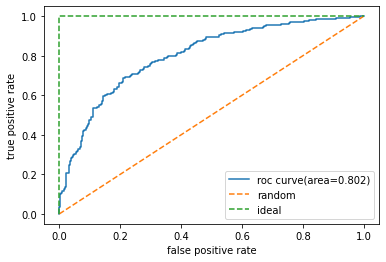

In [ ]:
result(x_train, y_train, x_test, y_test)

## **正則化回帰(線形重回帰分析)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='none')
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

-----intercept-----
[-0.1587124]
-----predict_proba-----
[[0.84318675 0.15681325]
 [0.36523482 0.63476518]
 [0.38375854 0.61624146]
 [0.75703103 0.24296897]
 [0.84380644 0.15619356]]
-----confusion matrix-----
[[205  81]
 [ 87 234]]
-----accuracy(train)-----
0.724
-----accuracy(test)------
0.723
-----precision-----
0.7428571428571429
-----recall-----
0.7289719626168224
-----f1 score-----
0.7358490566037735
-----auc------
0.8023222883035968
-----roc curve-----


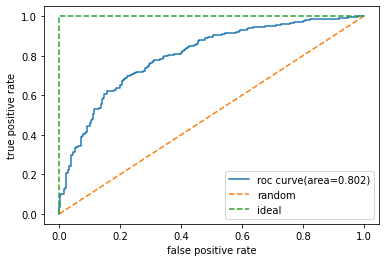

In [ ]:
result(x_train, y_train, x_test, y_test)

## **正則化回帰(リッジ回帰)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

-----intercept-----
[-0.07052645]
-----predict_proba-----
[[0.84157639 0.15842361]
 [0.37439575 0.62560425]
 [0.4020721  0.5979279 ]
 [0.76893717 0.23106283]
 [0.84037843 0.15962157]]
-----confusion matrix-----
[[207  79]
 [ 86 235]]
-----accuracy(train)-----
0.721
-----accuracy(test)------
0.728
-----precision-----
0.7484076433121019
-----recall-----
0.7320872274143302
-----f1 score-----
0.7401574803149605
-----auc------
0.8016360586454044
-----roc curve-----


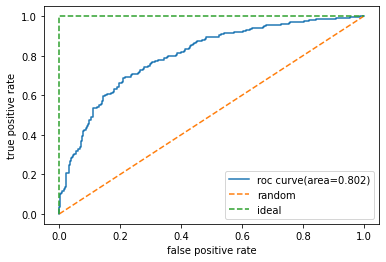

In [ ]:
result(x_train, y_train, x_test, y_test)

## **正則化回帰(ラッソ回帰)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', penalty='l1', C=0.8, max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

-----intercept-----
[-0.0113935]
-----predict_proba-----
[[0.8348768  0.1651232 ]
 [0.36243464 0.63756536]
 [0.39143802 0.60856198]
 [0.7491559  0.2508441 ]
 [0.82852555 0.17147445]]
-----confusion matrix-----
[[207  79]
 [ 83 238]]
-----accuracy(train)-----
0.723
-----accuracy(test)------
0.733
-----precision-----
0.750788643533123
-----recall-----
0.7414330218068536
-----f1 score-----
0.7460815047021944
-----auc------
0.8006230529595015
-----roc curve-----


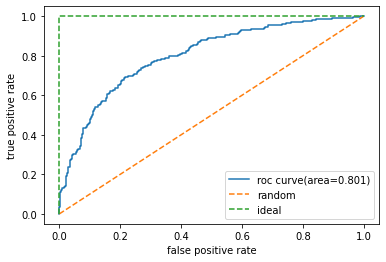

In [ ]:
result(x_train, y_train, x_test, y_test)

## **正則化回帰(Elastic Net)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', penalty='elasticnet', C=1.0, l1_ratio=0.5, max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

-----intercept-----
[-0.01157552]
-----predict_proba-----
[[0.83903145 0.16096855]
 [0.37102481 0.62897519]
 [0.39687598 0.60312402]
 [0.76046647 0.23953353]
 [0.83539152 0.16460848]]
-----confusion matrix-----
[[208  78]
 [ 84 237]]
-----accuracy(train)-----
0.722
-----accuracy(test)------
0.733
-----precision-----
0.7523809523809524
-----recall-----
0.7383177570093458
-----f1 score-----
0.7452830188679245
-----auc------
0.8012330348778948
-----roc curve-----


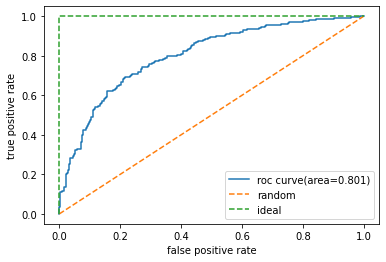

In [ ]:
result(x_train, y_train, x_test, y_test)

In [ ]:
def result_2(x_train, y_train, x_test, y_test):
    np.set_printoptions(suppress=True)
    print('-----predict_proba-----')
    print(model.predict_proba(x_test)[0:5])

    print('-----confusion matrix-----')
    print(confusion_matrix(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----accuracy(train)-----')
    print('{:.3f}' .format(model.score(x_train, y_train)))
    print('-----accuracy(test)------')
    print('{:.3f}' .format(model.score(x_test, y_test)))

    print('-----precision-----')
    print(precision_score(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----recall-----')
    print(recall_score(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----f1 score-----')
    print(f1_score(y_true=y_test, y_pred=model.predict(x_test)))

    print('-----auc------')
    print(roc_auc_score(y_true=y_test, y_score=model.predict_proba(x_test)[:, 1]))

    print('-----roc curve-----')
    y_score = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

    plt.plot(fpr, tpr, label='roc curve(area=%0.3f)' %auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], linestyle='--', label='random')
    plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
    plt.legend()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

## **決定木**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

-----predict_proba-----
[[0.83846154 0.16153846]
 [0.51327434 0.48672566]
 [0.3190184  0.6809816 ]
 [0.57627119 0.42372881]
 [0.80555556 0.19444444]]
-----confusion matrix-----
[[203  83]
 [103 218]]
-----accuracy(train)-----
0.769
-----accuracy(test)------
0.694
-----precision-----
0.7242524916943521
-----recall-----
0.6791277258566978
-----f1 score-----
0.7009646302250804
-----auc------
0.7505337341785939
-----roc curve-----


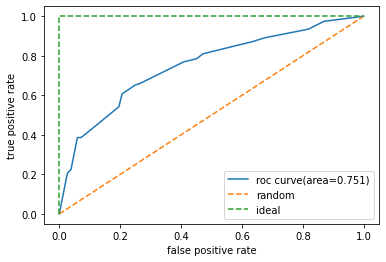

In [ ]:
result_2(x_train, y_train, x_test, y_test)

## **決定木 K分割交差検証法**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=10)

In [ ]:
print('-----Cross validation scores-----')
print('{}'.format(scores))
print('-----Cross validation scores-----')
print('{:.3f} +-{:.3f}'.format(scores.mean(), scores.std()))

-----Cross validation scores-----
[0.63054187 0.74752475 0.70792079 0.5990099  0.73267327 0.71782178
 0.75247525 0.7029703  0.67821782 0.70792079]
-----Cross validation scores-----
0.698 +-0.047


## **アンサンブル学習**

## **バギング正則化回帰**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

model = BaggingClassifier(
    LogisticRegression(solver='lbfgs', penalty='l2', C=1.0),
    n_estimators=100, random_state=0)
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=0, v

-----predict_proba-----
[[0.84218096 0.15781904]
 [0.36704805 0.63295195]
 [0.39884715 0.60115285]
 [0.77431573 0.22568427]
 [0.8384173  0.1615827 ]]
-----confusion matrix-----
[[209  77]
 [ 84 237]]
-----accuracy(train)-----
0.724
-----accuracy(test)------
0.735
-----precision-----
0.7547770700636943
-----recall-----
0.7383177570093458
-----f1 score-----
0.7464566929133859
-----auc------
0.803019410496046
-----roc curve-----


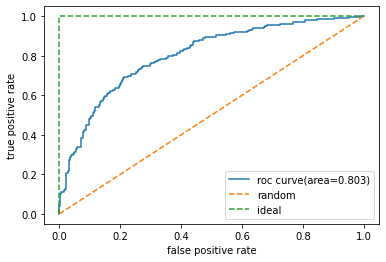

In [ ]:
result_2(x_train, y_train, x_test, y_test)

## **ブースティング正則化回帰**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

model = AdaBoostClassifier(
    LogisticRegression(solver='lbfgs', penalty='l2', C=1.0),
    random_state=0)
model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=0)

-----predict_proba-----
[[0.50824661 0.49175339]
 [0.49698668 0.50301332]
 [0.49835262 0.50164738]
 [0.50605613 0.49394387]
 [0.50736681 0.49263319]]
-----confusion matrix-----
[[206  80]
 [ 87 234]]
-----accuracy(train)-----
0.714
-----accuracy(test)------
0.725
-----precision-----
0.7452229299363057
-----recall-----
0.7289719626168224
-----f1 score-----
0.737007874015748
-----auc------
0.7956124872012722
-----roc curve-----


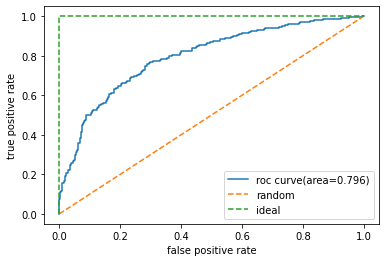

In [ ]:
result_2(x_train, y_train, x_test, y_test)

## **ランダムフォレスト**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

-----predict_proba-----
[[0.74655426 0.25344574]
 [0.40271908 0.59728092]
 [0.4689989  0.5310011 ]
 [0.70501298 0.29498702]
 [0.68596005 0.31403995]]
-----confusion matrix-----
[[216  70]
 [ 97 224]]
-----accuracy(train)-----
0.739
-----accuracy(test)------
0.725
-----precision-----
0.7619047619047619
-----recall-----
0.6978193146417445
-----f1 score-----
0.7284552845528455
-----auc------
0.7867677493845718
-----roc curve-----


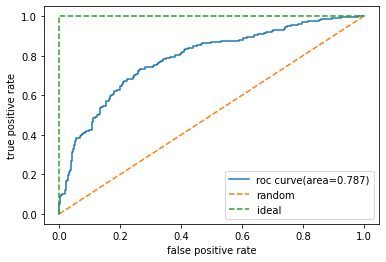

In [ ]:
result_2(x_train, y_train, x_test, y_test)

## **LightGBM**

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
               n_estimators=150, n_jobs=-1, num_leaves=30, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=20000, subsample_freq=0)
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
               n_estimators=150, n_jobs=-1, num_leaves=30, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=20000, subsample_freq=0)

-----predict_proba-----
[[0.7681602  0.2318398 ]
 [0.48665701 0.51334299]
 [0.48661526 0.51338474]
 [0.71808819 0.28191181]
 [0.76022296 0.23977704]]
-----confusion matrix-----
[[219  67]
 [ 92 229]]
-----accuracy(train)-----
0.761
-----accuracy(test)------
0.738
-----precision-----
0.7736486486486487
-----recall-----
0.7133956386292835
-----f1 score-----
0.7423014586709886
-----auc------
0.8062163693004815
-----roc curve-----


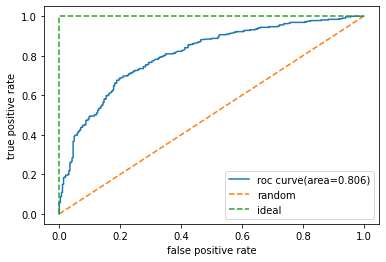

In [ ]:
result_2(x_train, y_train, x_test, y_test) 

## **LightGBM K分割交差検証法**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=20)
print('-----Cross validation scores-----')
print('{}'.format(scores))
print('-----Cross validation scores-----')
print('{:.3f} +-{:.3f}'.format(scores.mean(), scores.std()))

-----Cross validation scores-----
[0.67647059 0.78217822 0.78217822 0.79207921 0.73267327 0.77227723
 0.68316832 0.7029703  0.71287129 0.74257426 0.75247525 0.71287129
 0.81188119 0.77227723 0.74257426 0.72277228 0.78217822 0.7029703
 0.71287129 0.77227723]
-----Cross validation scores-----
0.743 +-0.038


## **LightGBMグリッドサーチ**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'bossting_type': ['gbdt', 'dart'],
          'max_depth': np.arange(3, 7),
          'min_child_samples': np.arange(15, 40, 5),
          'learning_rate': np.arange(0.03, 0.09, 0.01)}
model = GridSearchCV(estimator=lgb.LGBMClassifier(),
                     param_grid=params,
                     cv=10)
model.fit(x_train, y_train)

In [ ]:
def grid_result(model, x_test, y_test):
    print('-----Best cross validation score-----')
    print('{:.3f}'.format(model.best_score_))
    print('-----Best parameters-----')
    print('{}'.format(model.best_params_))
    print('-----Test score-----')
    print('{:.3f}'.format(model.score(x_test, y_test)))

In [ ]:
grid_result(model, x_test, y_test)

## **全データ使用**

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.07, max_depth=5,
               min_child_samples=35, min_child_weight=0.001, min_split_gain=0,
               n_estimators=150, n_jobs=-1, num_leaves=40, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=20000, subsample_freq=0)
model.fit(x, y)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.07, max_depth=5,
               min_child_samples=35, min_child_weight=0.001, min_split_gain=0,
               n_estimators=150, n_jobs=-1, num_leaves=40, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=20000, subsample_freq=0)

## **投稿用ファイルの生成**

In [ ]:
test.head()

,Open,High,Low,Close,Body,Body_rate_1,Body_rate_2,Body_rate_3,Body_rate_4,Body_rate_5,Body_rate_mean,Rate_1,Rate_2,Rate_3,Rate_4,Rate_5,rate_total,rate_5_mean,high_low_1,high_low_2,high_low_3,high_low_4,high_low_5,high_low_6,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,week_Monday,week_Thursday,week_Tuesday,week_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-19,110.79,110.82,109.96,110.39,0.40,0.00,0.00,0.00,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.86,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-01-20,110.45,111.10,110.36,110.73,-0.28,0.40,0.00,0.00,0.0,0.0,0.080,0.003080,0.000000,0.000000,0.000000,0.0,0.003080,0.000616,0.74,0.74,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-01-23,110.95,111.10,109.65,110.36,0.59,-0.28,0.40,0.00,0.0,0.0,0.024,-0.003341,-0.000272,0.000000,0.000000,0.0,-0.003613,-0.000723,1.45,1.45,1.45,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2012-01-24,110.16,110.16,108.13,108.39,1.77,0.59,-0.28,0.40,0.0,0.0,0.142,-0.017851,-0.021132,-0.018118,0.000000,0.0,-0.057101,-0.011420,2.03,2.97,2.97,2.97,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2012-01-25,106.25,107.11,105.97,106.89,-0.64,1.77,0.59,-0.28,0.4,0.0,0.496,-0.013839,-0.031443,-0.034679,-0.031706,0.0,-0.111666,-0.022333,1.14,4.19,5.13,5.13,5.13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_submit = pd.Series(model.predict(test))
y_submit = y_submit[5::6].reset_index(drop=True)
y_submit

0      1
1      0
2      0
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    1
Length: 200, dtype: int64

In [ ]:
'''
test.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
y_submit = pd.Series(model.predict(test))
y_submit = y_submit[5::6].reset_index(drop=True)
y_submit
'''

0      0
1      1
2      0
3      0
4      1
      ..
195    0
196    0
197    0
198    0
199    1
Length: 200, dtype: int64

In [ ]:
y_submit.value_counts()

0    101
1     99
dtype: int64

In [ ]:
submission = pd.read_csv('sample_submission.csv', header=None)
submission[0] = pd.to_datetime(submission[0], format='%Y/%m/%d')
submission[1] = y_submit

In [ ]:
submission.to_csv('submit_1.csv', index=False, header=False)

In [ ]:
submission

,0,1
0,2012-01-26,1
1,2012-02-09,0
2,2012-02-24,0
3,2012-03-09,1
4,2012-03-23,1
...,...,...
195,2019-10-25,1
196,2019-11-08,1
197,2019-11-22,1
198,2019-12-09,0


In [ ]:
test[5::6]

## **前処理後のデータの読み込み**

In [ ]:
train = pd.read_csv('train_data.csv', index_col=0)
test = pd.read_csv('test_data.csv', index_col=0)
train.head()

In [ ]:
x = train.drop('Up', axis=1)
y = train['Up']

## **データの分割**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)